Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as pltly

In [3]:
#load the data
dfloan = pd.read_csv("loan.csv") #export csv
dfloan.shape #get the shape of data

C:\Users\jaypa\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(39717, 111)

# sanity check

In [4]:
dfloan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [5]:
#funded amount should not be greater than loan amount
dfloan[dfloan["loan_amnt"] >= dfloan["funded_amnt"]].shape

(39717, 111)

In [6]:
#funded invest amount should not be greater than loan amount
dfloan[dfloan["loan_amnt"] >= dfloan["funded_amnt_inv"]].shape

(39717, 111)

In [7]:
#subgrade first letter must match with grade  like if subgrade is B2 then grade is B
dfloan[dfloan.grade == dfloan.sub_grade.str[0]].shape

(39717, 111)

In [8]:
dfloan.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

# data cleaning

In [9]:
dfloan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

Observed that some columns we have a no data(we identify that we have 39717 data and some columns has a 39717 null values) 

In [10]:
dfloan = dfloan.drop(columns=dfloan.loc[:,dfloan.isnull().sum() == 39717].columns)
dfloan.shape

(39717, 57)

In [11]:
dfloan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

next_pymnt_d,mths_since_last_record,mths_since_last_delinq is to many null values to handle to we drop that columns                

In [12]:
dfloan = dfloan.drop(columns=dfloan.loc[:,dfloan.isnull().sum() > 25000].columns)
dfloan.shape

(39717, 54)

In [13]:
dfloan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [14]:
#we observed that are  url has a same url just change the query string value with member id it givies nothing new information so we can drop url column also we observed that are  url has a same url just change the query string value with member id it givies nothing new information so we can drop url column.
dfloan = dfloan.drop(columns=['url','desc','title'])
dfloan.shape

(39717, 51)

In [15]:
dfloan.isnull().sum()

id                               0
member_id                        0
loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
term                             0
int_rate                         0
installment                      0
grade                            0
sub_grade                        0
emp_title                     2459
emp_length                    1075
home_ownership                   0
annual_inc                       0
verification_status              0
issue_d                          0
loan_status                      0
pymnt_plan                       0
purpose                          0
zip_code                         0
addr_state                       0
dti                              0
delinq_2yrs                      0
earliest_cr_line                 0
inq_last_6mths                   0
open_acc                         0
pub_rec                          0
revol_bal                        0
revol_util          

In [16]:
dfloan.emp_title

0                               NaN
1                             Ryder
2                               NaN
3               AIR RESOURCES BOARD
4          University Medical Group
                    ...            
39712               FiSite Research
39713    Squarewave Solutions, Ltd.
39714                           NaN
39715                           NaN
39716              Evergreen Center
Name: emp_title, Length: 39717, dtype: object

In [17]:
dfloan["emp_title"] = dfloan["emp_title"].fillna('No Title')
dfloan.emp_title.value_counts()

No Title                    2459
US Army                      134
Bank of America              109
IBM                           66
AT&T                          59
                            ... 
JHT, Inc.                      1
Los Rios School District       1
M. S.                          1
MORRISON & FOERSTER            1
Duke Energy Corp               1
Name: emp_title, Length: 28821, dtype: int64

In [18]:
dfloan.emp_length.value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [19]:
dfloan["emp_length"] = dfloan["emp_length"].str.replace(' years','')
dfloan["emp_length"] = dfloan["emp_length"].str.replace(' year','')
dfloan["emp_length"] = dfloan["emp_length"].str.replace('+','')
dfloan["emp_length"] = dfloan["emp_length"].str.replace('< ','')

<ipython-input-19-fd82b6d32ddd>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  dfloan["emp_length"] = dfloan["emp_length"].str.replace('+','')


In [20]:
dfloan.emp_length.value_counts()

10    8879
1     7823
2     4388
3     4095
4     3436
5     3282
6     2229
7     1773
8     1479
9     1258
Name: emp_length, dtype: int64

In [21]:
dfloan.isnull().sum()

id                               0
member_id                        0
loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
term                             0
int_rate                         0
installment                      0
grade                            0
sub_grade                        0
emp_title                        0
emp_length                    1075
home_ownership                   0
annual_inc                       0
verification_status              0
issue_d                          0
loan_status                      0
pymnt_plan                       0
purpose                          0
zip_code                         0
addr_state                       0
dti                              0
delinq_2yrs                      0
earliest_cr_line                 0
inq_last_6mths                   0
open_acc                         0
pub_rec                          0
revol_bal                        0
revol_util          

In [22]:
100 * dfloan.emp_length.isnull().sum() /dfloan.shape[0] 

2.7066495455346575

In [23]:
#only 3 percentage data is null so we can replace with zero
dfloan["emp_length"] = dfloan["emp_length"].fillna(0)

In [24]:
dfloan["emp_length"]  = dfloan["emp_length"].astype("int32")

In [25]:
dfloan.revol_util

0        83.70%
1         9.40%
2        98.50%
3           21%
4        53.90%
          ...  
39712    13.10%
39713    26.90%
39714    19.40%
39715     0.70%
39716    51.50%
Name: revol_util, Length: 39717, dtype: object

In [26]:
dfloan["revol_util"] = dfloan["revol_util"].fillna(0.0)

In [27]:
dfloan.isnull().sum()

id                              0
member_id                       0
loan_amnt                       0
funded_amnt                     0
funded_amnt_inv                 0
term                            0
int_rate                        0
installment                     0
grade                           0
sub_grade                       0
emp_title                       0
emp_length                      0
home_ownership                  0
annual_inc                      0
verification_status             0
issue_d                         0
loan_status                     0
pymnt_plan                      0
purpose                         0
zip_code                        0
addr_state                      0
dti                             0
delinq_2yrs                     0
earliest_cr_line                0
inq_last_6mths                  0
open_acc                        0
pub_rec                         0
revol_bal                       0
revol_util                      0
total_acc     

In [28]:
dfloan.last_pymnt_d.value_counts()  

May-16    1256
Mar-13    1026
Dec-14     945
May-13     907
Feb-13     869
          ... 
Nov-08      10
Jun-08      10
Mar-08       5
Jan-08       4
Feb-08       1
Name: last_pymnt_d, Length: 101, dtype: int64

In [29]:
dfloan = dfloan[~dfloan.last_pymnt_d.isnull()]

In [30]:
dfloan.isnull().sum()

id                              0
member_id                       0
loan_amnt                       0
funded_amnt                     0
funded_amnt_inv                 0
term                            0
int_rate                        0
installment                     0
grade                           0
sub_grade                       0
emp_title                       0
emp_length                      0
home_ownership                  0
annual_inc                      0
verification_status             0
issue_d                         0
loan_status                     0
pymnt_plan                      0
purpose                         0
zip_code                        0
addr_state                      0
dti                             0
delinq_2yrs                     0
earliest_cr_line                0
inq_last_6mths                  0
open_acc                        0
pub_rec                         0
revol_bal                       0
revol_util                      0
total_acc     

In [31]:
dfloan = dfloan[~dfloan.last_credit_pull_d.isnull()]

In [32]:
dfloan.collections_12_mths_ex_med.value_counts()    

0.0    39588
Name: collections_12_mths_ex_med, dtype: int64

In [33]:
dfloan.chargeoff_within_12_mths.value_counts()

0.0    39588
Name: chargeoff_within_12_mths, dtype: int64

In [34]:
dfloan.pub_rec_bankruptcies.value_counts()

0.0    37273
1.0     1668
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [35]:
dfloan.tax_liens.value_counts()

0.0    39605
Name: tax_liens, dtype: int64

In [36]:
#those columns values are zero
dfloan = dfloan.drop(columns=['collections_12_mths_ex_med','chargeoff_within_12_mths','tax_liens'])
dfloan.isnull().sum()

id                           0
member_id                    0
loan_amnt                    0
funded_amnt                  0
funded_amnt_inv              0
term                         0
int_rate                     0
installment                  0
grade                        0
sub_grade                    0
emp_title                    0
emp_length                   0
home_ownership               0
annual_inc                   0
verification_status          0
issue_d                      0
loan_status                  0
pymnt_plan                   0
purpose                      0
zip_code                     0
addr_state                   0
dti                          0
delinq_2yrs                  0
earliest_cr_line             0
inq_last_6mths               0
open_acc                     0
pub_rec                      0
revol_bal                    0
revol_util                   0
total_acc                    0
initial_list_status          0
out_prncp                    0
out_prnc

In [37]:
#d
dfloan["pub_rec_bankruptcies"] = dfloan["pub_rec_bankruptcies"].fillna(dfloan.pub_rec_bankruptcies.median()) 

In [38]:
dfloan.isnull().sum()

id                         0
member_id                  0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_title                  0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
pymnt_plan                 0
purpose                    0
zip_code                   0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
initial_list_status        0
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
total_pymnt_in

In [39]:
dfloan.shape

(39644, 48)

In [40]:
dfloan.term.value_counts()

 36 months    29041
 60 months    10603
Name: term, dtype: int64

In [41]:
dfloan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,policy_code,application_type,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,0.00,0.00,Jan-15,171.62,May-16,1,INDIVIDUAL,0,0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,117.08,1.11,Apr-13,119.66,Sep-13,1,INDIVIDUAL,0,0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,0.00,0.00,Jun-14,649.91,May-16,1,INDIVIDUAL,0,0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,0.00,0.00,Jan-15,357.48,Apr-16,1,INDIVIDUAL,0,0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,0.00,0.00,May-16,67.79,May-16,1,INDIVIDUAL,0,0,0.0


In [42]:
dfloan["term"] = dfloan["term"].str.replace(' months','')

In [43]:
dfloan["term"]  = dfloan["term"].astype("int32")

In [44]:
dfloan["int_rate"] = dfloan["int_rate"].str.replace('%','')

In [45]:
dfloan["int_rate"]  = dfloan["int_rate"].astype("float32")

In [46]:
dfloan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,policy_code,application_type,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,...,0.00,0.00,Jan-15,171.62,May-16,1,INDIVIDUAL,0,0,0.0
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,...,117.08,1.11,Apr-13,119.66,Sep-13,1,INDIVIDUAL,0,0,0.0
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,...,0.00,0.00,Jun-14,649.91,May-16,1,INDIVIDUAL,0,0,0.0
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,...,0.00,0.00,Jan-15,357.48,Apr-16,1,INDIVIDUAL,0,0,0.0
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,...,0.00,0.00,May-16,67.79,May-16,1,INDIVIDUAL,0,0,0.0


In [47]:
dfloan.dtypes

id                           int64
member_id                    int64
loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                         int32
int_rate                   float32
installment                float64
grade                       object
sub_grade                   object
emp_title                   object
emp_length                   int32
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
pymnt_plan                  object
purpose                     object
zip_code                    object
addr_state                  object
dti                        float64
delinq_2yrs                  int64
earliest_cr_line            object
inq_last_6mths               int64
open_acc                     int64
pub_rec                      int64
revol_bal                    int64
revol_util          

In [48]:
dfloan.nunique()

id                         39644
member_id                  39644
loan_amnt                    885
funded_amnt                 1041
funded_amnt_inv             8205
term                           2
int_rate                     371
installment                15365
grade                          7
sub_grade                     35
emp_title                  28770
emp_length                    11
home_ownership                 5
annual_inc                  5309
verification_status            3
issue_d                       55
loan_status                    3
pymnt_plan                     1
purpose                       14
zip_code                     823
addr_state                    50
dti                         2868
delinq_2yrs                   11
earliest_cr_line             526
inq_last_6mths                 9
open_acc                      40
pub_rec                        5
revol_bal                  21699
revol_util                  1090
total_acc                     82
initial_li

In [49]:
dfloan = dfloan.drop(columns=dfloan.loc[:,dfloan.nunique() == 1].columns)
dfloan.shape

(39644, 42)

In [50]:
dfloan.nunique()

id                         39644
member_id                  39644
loan_amnt                    885
funded_amnt                 1041
funded_amnt_inv             8205
term                           2
int_rate                     371
installment                15365
grade                          7
sub_grade                     35
emp_title                  28770
emp_length                    11
home_ownership                 5
annual_inc                  5309
verification_status            3
issue_d                       55
loan_status                    3
purpose                       14
zip_code                     823
addr_state                    50
dti                         2868
delinq_2yrs                   11
earliest_cr_line             526
inq_last_6mths                 9
open_acc                      40
pub_rec                        5
revol_bal                  21699
revol_util                  1090
total_acc                     82
out_prncp                   1137
out_prncp_

In [51]:
dfloan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')

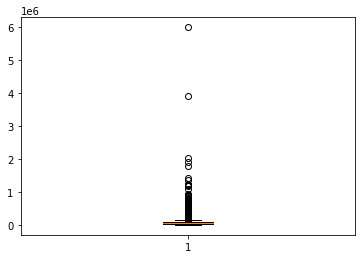

In [52]:
#plt.boxplot(dfloan['annual_inc'])
plt.boxplot(dfloan['annual_inc'])
plt.show()

In [53]:
dfloan.annual_inc.describe()

count    3.964400e+04
mean     6.900832e+04
std      6.383481e+04
min      4.000000e+03
25%      4.050000e+04
50%      5.900000e+04
75%      8.240400e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [54]:
dfloan = dfloan[dfloan.annual_inc < 300000]

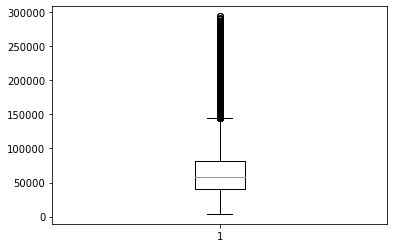

In [55]:
plt.boxplot(dfloan['annual_inc'])
plt.show()

In [56]:
dfloan.dtypes

id                           int64
member_id                    int64
loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                         int32
int_rate                   float32
installment                float64
grade                       object
sub_grade                   object
emp_title                   object
emp_length                   int32
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
purpose                     object
zip_code                    object
addr_state                  object
dti                        float64
delinq_2yrs                  int64
earliest_cr_line            object
inq_last_6mths               int64
open_acc                     int64
pub_rec                      int64
revol_bal                    int64
revol_util                  object
total_acc           

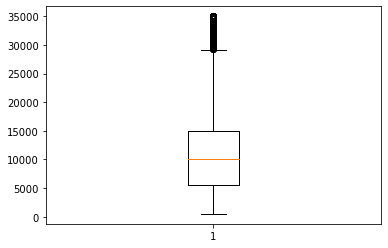

In [57]:
plt.boxplot(dfloan.loan_amnt)
plt.show()

In [58]:
dfloan = dfloan[dfloan.loan_status != "Current"]

# Univariate Analysis

In [59]:
dfloan.loan_status.value_counts()

Fully Paid     32755
Charged Off     5531
Name: loan_status, dtype: int64

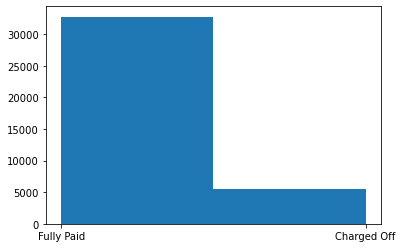

In [60]:
plt.hist(dfloan.loan_status,bins=2)
plt.show()

C:\Users\jaypa\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


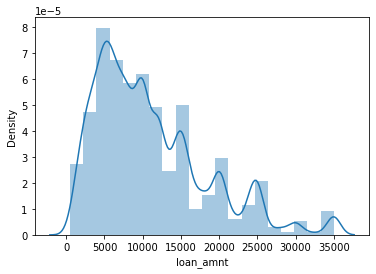

In [61]:
sns.distplot(dfloan.loan_amnt,bins=20)
plt.show()

In [62]:
dfloannotdefault = dfloan[dfloan.loan_status == "Fully Paid"]

In [63]:
dfloandefault = dfloan[dfloan.loan_status == "Charged Off"]

C:\Users\jaypa\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


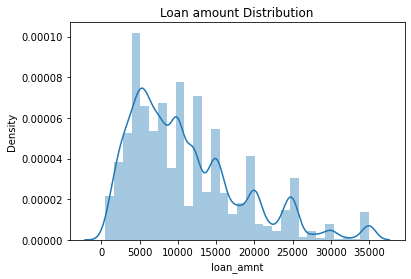

In [64]:
sns.distplot(dfloan.loan_amnt,bins=30)
plt.title('Loan amount Distribution')
plt.show()

C:\Users\jaypa\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


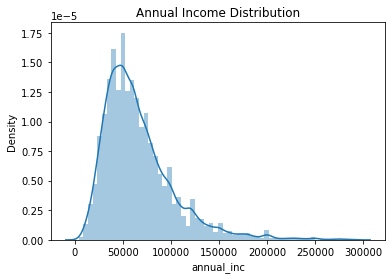

In [65]:
sns.distplot(dfloan.annual_inc,bins=60)
plt.title('Annual Income Distribution')
plt.show()

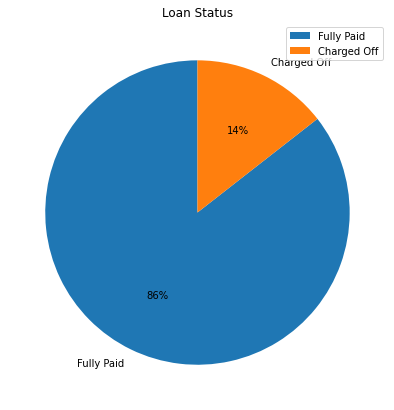

In [66]:
plt.figure(figsize = [9,7])
mylables = ["Fully Paid", "Charged Off"]

plt.pie(dfloan['loan_status'].value_counts(),startangle=90,labels = mylables,autopct='%1.0f%%')
plt.title('Loan Status')
plt.legend()
plt.show()

In [67]:
dfloan['loan_status'].value_counts()

Fully Paid     32755
Charged Off     5531
Name: loan_status, dtype: int64

No handles with labels found to put in legend.


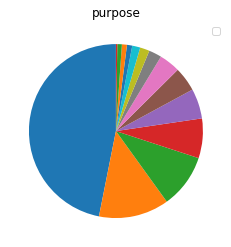

In [68]:
plt.pie(dfloan['purpose'].value_counts(),startangle=90)
plt.title('purpose')
plt.legend()
plt.show()

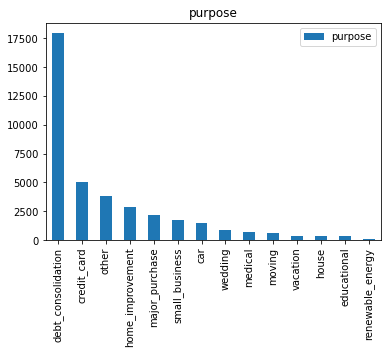

In [69]:
dfloan['purpose'].value_counts().plot.bar()
plt.title('purpose')
plt.legend()
plt.show()

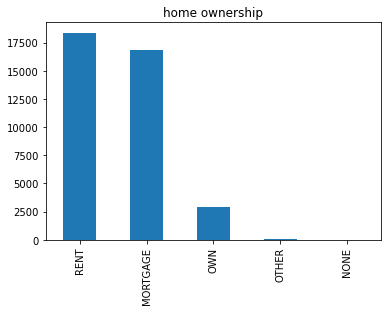

In [70]:
dfloan['home_ownership'].value_counts().plot.bar()
plt.title('home ownership')
plt.show()

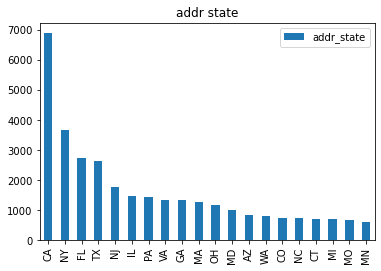

In [71]:
dfloan['addr_state'].value_counts()[:20].plot.bar()
plt.title('addr state')
plt.legend()
plt.show()

In [72]:
dfloan.dtypes

id                           int64
member_id                    int64
loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                         int32
int_rate                   float32
installment                float64
grade                       object
sub_grade                   object
emp_title                   object
emp_length                   int32
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
purpose                     object
zip_code                    object
addr_state                  object
dti                        float64
delinq_2yrs                  int64
earliest_cr_line            object
inq_last_6mths               int64
open_acc                     int64
pub_rec                      int64
revol_bal                    int64
revol_util                  object
total_acc           

C:\Users\jaypa\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


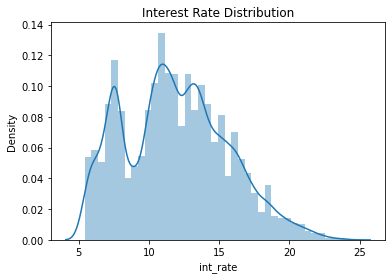

In [73]:
sns.distplot(dfloan.int_rate,bins=40)
plt.title('Interest Rate Distribution')
plt.show()

# segmented univariate analysis 

SyntaxError: invalid character in identifier (<ipython-input-74-e91d2453ef9c>, line 6)

C:\Users\jaypa\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


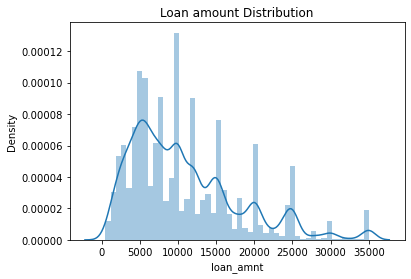

In [75]:
sns.distplot(dfloannotdefault.loan_amnt,bins=50)
plt.title('Loan amount Distribution')
plt.show()

C:\Users\jaypa\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


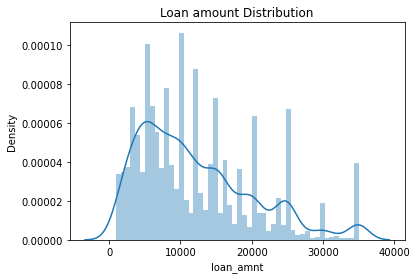

In [76]:
sns.distplot(dfloandefault.loan_amnt,bins=50)
plt.title('Loan amount Distribution')
plt.show()

# bivariate analysis

<Figure size 648x504 with 0 Axes>

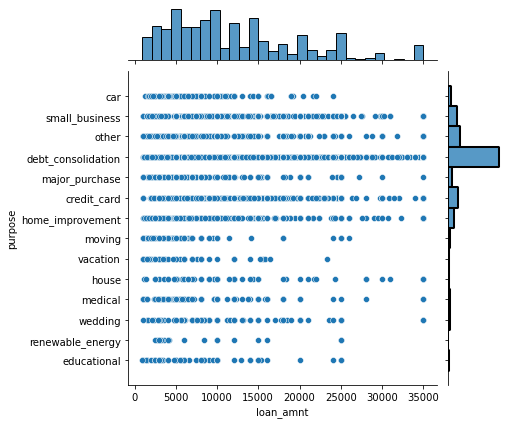

In [105]:
plt.figure(figsize = [9,7])
sns.jointplot(x = dfloandefault.loan_amnt,y = dfloandefault.purpose)
plt.show()

<Figure size 648x504 with 0 Axes>

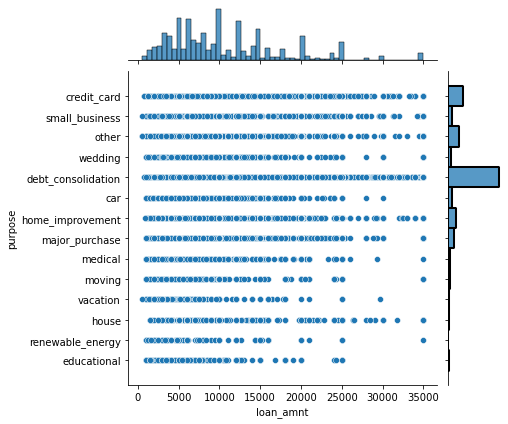

In [107]:
plt.figure(figsize = [9,7])
sns.jointplot(x = dfloannotdefault.loan_amnt,y = dfloannotdefault.purpose)
plt.show()

<Figure size 648x504 with 0 Axes>

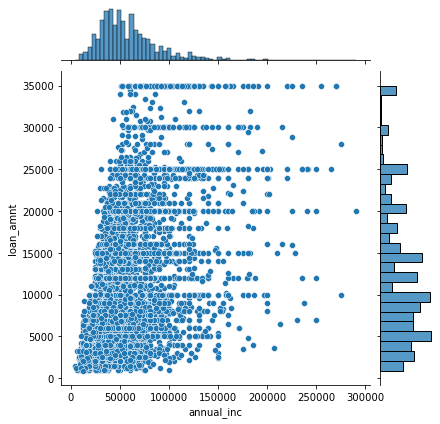

In [159]:
plt.figure(figsize = [9,7])
sns.jointplot(x = dfloandefault.annual_inc,y = dfloandefault.loan_amnt)
plt.show()

<Figure size 648x504 with 0 Axes>

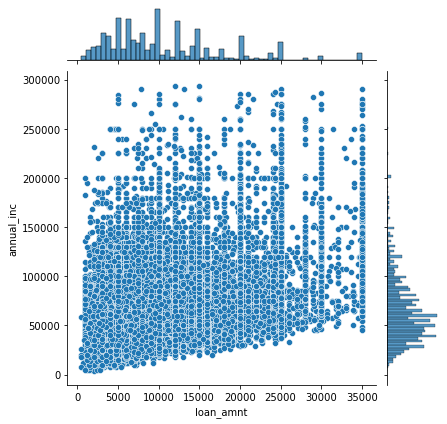

In [158]:
plt.figure(figsize = [9,7])
sns.jointplot(y = dfloannotdefault.annual_inc,x = dfloannotdefault.loan_amnt)
plt.show()

<Figure size 648x504 with 0 Axes>

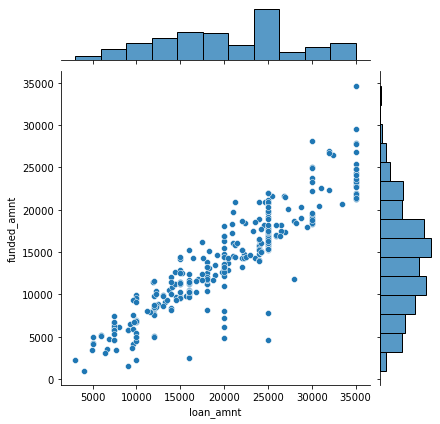

In [111]:
plt.figure(figsize = [9,7])
sns.jointplot(x = dfloandefault[dfloandefault["loan_amnt"] != dfloandefault["funded_amnt"]].loan_amnt,y = dfloandefault[dfloandefault["loan_amnt"] != dfloandefault["funded_amnt"]].funded_amnt)
plt.show()

<Figure size 648x504 with 0 Axes>

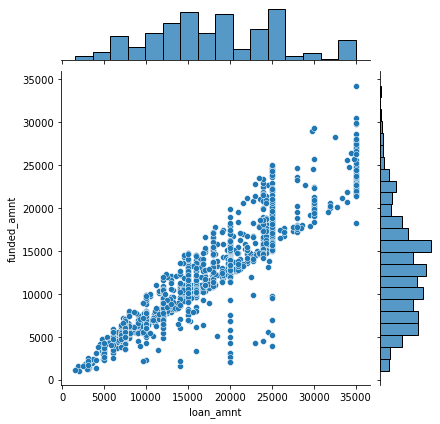

In [120]:
plt.figure(figsize = [9,7])
sns.jointplot(x = dfloannotdefault[dfloannotdefault["loan_amnt"] != dfloannotdefault["funded_amnt"]].loan_amnt,y = dfloannotdefault[dfloannotdefault["loan_amnt"] != dfloannotdefault["funded_amnt"]].funded_amnt)
plt.show()

loan amnt and funded amnt is corrlate to other so if we can get any conclusion on loan amnt or funded amnt both are equivalent

<Figure size 648x504 with 0 Axes>

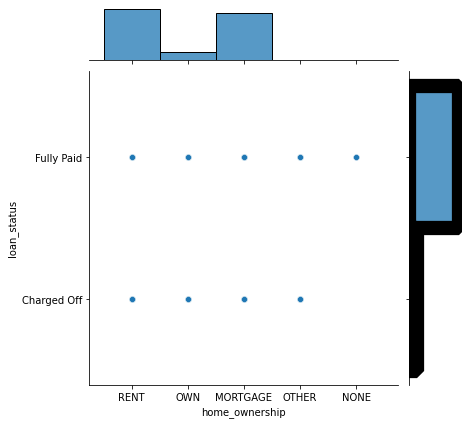

In [117]:
plt.figure(figsize = [9,7])
sns.jointplot(y = dfloan.loan_status,x = dfloan.home_ownership)
plt.show()
#we can conclude that 

In [145]:
homeownership = pd.pivot_table(data = dfloan, values = "annual_inc",index="loan_status",columns = "home_ownership",aggfunc = np.mean)
homeownership

home_ownership,MORTGAGE,NONE,OTHER,OWN,RENT
loan_status,,,,,
Charged Off,72611.374061,NaN,63433.055556,51536.519586,52207.24040
Fully Paid,80034.502037,80733.333333,66412.113924,57511.752801,56626.77029


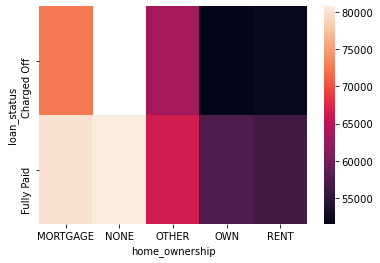

In [147]:
sns.heatmap(homeownership)
plt.show()

from heat map and joinplot we can conclude that a person who has a own house has a less annual income

In [151]:
np.mean(dfloan[dfloan["home_ownership"] == "MORTGAGE"].annual_inc)

79021.67683988845

In [152]:
np.mean(dfloan[dfloan["home_ownership"] == "OWN"].annual_inc)

56631.25603658537

In [164]:
purpose = pd.pivot_table(data = dfloan, values = "annual_inc",index="loan_status",columns = "purpose",aggfunc = np.mean)
purpose

purpose,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
loan_status,,,,,,,,,,,,,,
Charged Off,54560.024500,63505.702528,60588.486683,53947.188679,69992.329941,72219.081404,50819.530419,57578.133333,46913.252747,57352.483548,61331.979444,65762.498427,52452.528302,61418.435000
Fully Paid,62499.459701,69331.570828,65884.440595,52452.744701,81658.300411,70692.558013,64687.546300,66149.375884,60869.285813,61777.495047,68776.481481,75387.570536,60224.936801,65888.478509


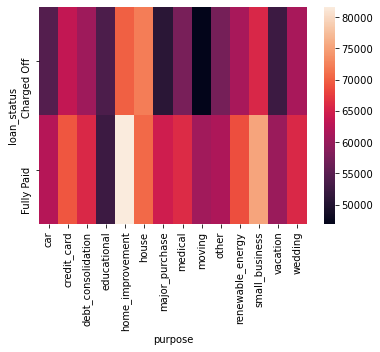

In [165]:
sns.heatmap(purpose)
plt.show()

 --> purpose of moving  with 50000 -55000,carloan with less then 60000  income who are the most charged off,
 --> home improvement with 75000 - 80000 salary is are the less chance of the charged off